# Loading and normalizing datasets

# FashionMNIST
- 28 x 28 grayscale image
- 60,000 training examples / 10,000 test examples
- 10 Labels
    - T-shirt/top
    - Trouser
    - Pullover
    - Dress
    - Coat
    - Sandal
    - Shirt
    - Sneaker
    - Bag
    - Ankle boot


In [2]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Iterating and Visualizing the Dataset

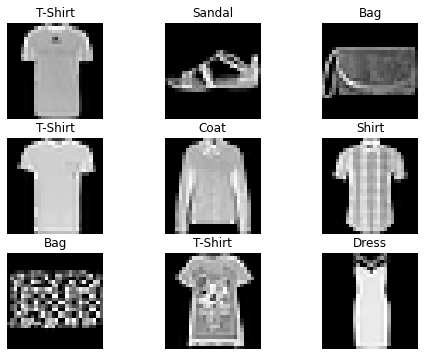

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 6))
cols, rows = 3, 3

for i in range(1,cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1, )).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()  

In [9]:
training_data[6545][0].squeeze().shape # 1로 표시되는 차원 삭제제

torch.Size([28, 28])

In [10]:
training_data[6545][1] # 정답답

8

In [7]:
training_data[6375][0].shape

torch.Size([1, 28, 28])

# Preparing your data for training with DataLoaders

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate through the DataLoader

In [13]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader)) # next, iter 다음 사진진
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


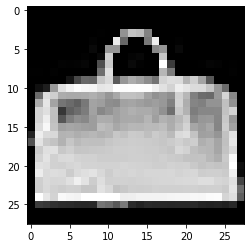

Label: 8


In [14]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 2.Normalization(정규화)

- 값의 범위를 0-1 사이로 변경
- 학습 전에 scaling하는 이유
    - 머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지
    - 딥러닝에서 Loacal Minima에 빠질 위험 감소(학습 속도 향상)

# Transforms

In [21]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [22]:
sample_idx = torch.randint(len(ds), size=(1, )).item()
sample_idx

45703

In [23]:
_, ds_label = ds[sample_idx]
_, traing_label = training_data[sample_idx]

print(f'ds_label: {ds_label} / traing_label: {traing_label}')

ds_label: tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]) / traing_label: 6
